In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Successful_valid and Successful_unique

In [2]:
col_name = ['valid_in_tolerance', 'unique_in_tolerance']

In [3]:
# unconditioned generation

uc_res = pd.DataFrame({
    col_name[0]: [0.9948],
    col_name[1]: [0.994]
})

In [4]:
# property based generation

p_res1 = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/p-sampling/pvaetf1-15/metric.csv', index_col=[0])
p_res2 = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/p-sampling/pvaetf2-15/metric.csv', index_col=[0])
p_res3 = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/p-sampling/pvaetf3-15/metric.csv', index_col=[0])

p_res = (p_res1[col_name] + p_res2[col_name] + p_res3[col_name]) / 3

In [5]:
# structure based generation

sca_res1_seen = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf1-15/train/metric.csv', index_col=[0])
sca_res2_seen = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf2-16/train/metric.csv', index_col=[0])
sca_res3_seen = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf3-16/train/metric.csv', index_col=[0])
sca_res_seen = (sca_res1_seen[col_name] + sca_res2_seen[col_name] + sca_res3_seen[col_name]) / 3

sca_res1_unseen = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf1-15/test_scaffolds/metric.csv', index_col=[0])
sca_res2_unseen = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf2-16/test_scaffolds/metric.csv', index_col=[0])
sca_res3_unseen = pd.read_csv('/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/sca-sampling/scavaetf3-16/test_scaffolds/metric.csv', index_col=[0])
sca_res_unseen = (sca_res1_unseen[col_name] + sca_res2_unseen[col_name] + sca_res3_unseen[col_name]) / 3

In [6]:
# property and structure based generation

n_samples = 1000

psca_res1_seen = []
psca_res2_seen = []
psca_res3_seen = []
for i in range(100):
    psca_res1_seen.append(pd.read_csv(f'/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/psca-sampling/pscavaetf1-17/train/metric_s{i}.csv', index_col=[0]))
    psca_res2_seen.append(pd.read_csv(f'/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/psca-sampling/pscavaetf2-19/train/metric_s{i}.csv', index_col=[0]))
    psca_res3_seen.append(pd.read_csv(f'/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/psca-sampling/pscavaetf3-17/train/metric_s{i}.csv', index_col=[0]))
psca_res1_seen = pd.concat(psca_res1_seen, axis=0).reset_index(drop=False)
psca_res2_seen = pd.concat(psca_res2_seen, axis=0).reset_index(drop=False)
psca_res3_seen = pd.concat(psca_res3_seen, axis=0).reset_index(drop=False)
psca_res_seen = (psca_res1_seen[col_name] + psca_res2_seen[col_name] + psca_res3_seen[col_name]) / n_samples / 3


psca_res1_unseen = []
psca_res2_unseen = []
psca_res3_unseen = []
for i in range(100):
    psca_res1_unseen.append(pd.read_csv(f'/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/psca-sampling/pscavaetf1-17/test_scaffolds/metric_s{i}.csv', index_col=[0]))
    psca_res2_unseen.append(pd.read_csv(f'/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/psca-sampling/pscavaetf2-19/test_scaffolds/metric_s{i}.csv', index_col=[0]))
    psca_res3_unseen.append(pd.read_csv(f'/fileserver-gamma/chaoting/ML/cvae-transformer/Inference-Dataset/moses/psca-sampling/pscavaetf3-17/test_scaffolds/metric_s{i}.csv', index_col=[0]))
psca_res1_unseen = pd.concat(psca_res1_unseen, axis=0).reset_index(drop=False)
psca_res2_unseen = pd.concat(psca_res2_unseen, axis=0).reset_index(drop=False)
psca_res3_unseen = pd.concat(psca_res3_unseen, axis=0).reset_index(drop=False)
psca_res_unseen = (psca_res1_unseen[col_name] + psca_res2_unseen[col_name] + psca_res3_unseen[col_name]) / n_samples / 3


In [75]:

valid = [uc_res[[col_name[0]]], p_res[[col_name[0]]],
         sca_res_seen[[col_name[0]]], sca_res_unseen[[col_name[0]]], 
         psca_res_seen[[col_name[0]]], psca_res_unseen[[col_name[0]]]]
unique = [uc_res[[col_name[1]]], p_res[[col_name[1]]],
          sca_res_seen[[col_name[1]]], sca_res_unseen[[col_name[1]]], 
          psca_res_seen[[col_name[1]]], psca_res_unseen[[col_name[1]]]]


constraint = ['X', 'P', r'S$_{\mathdefault{seen}}$', r'S$_{\mathdefault{unseen}}$',
              r'P+S$_{\mathdefault{seen}}$', r'P+S$_{\mathdefault{unseen}}$']

for i in range(len(constraint)):
    valid[i] = valid[i].rename(columns={ 'valid_in_tolerance': constraint[i] })
    unique[i] = unique[i].rename(columns={ 'unique_in_tolerance': constraint[i] })

valid = pd.concat(valid, axis=1)
unique = pd.concat(unique, axis=1)

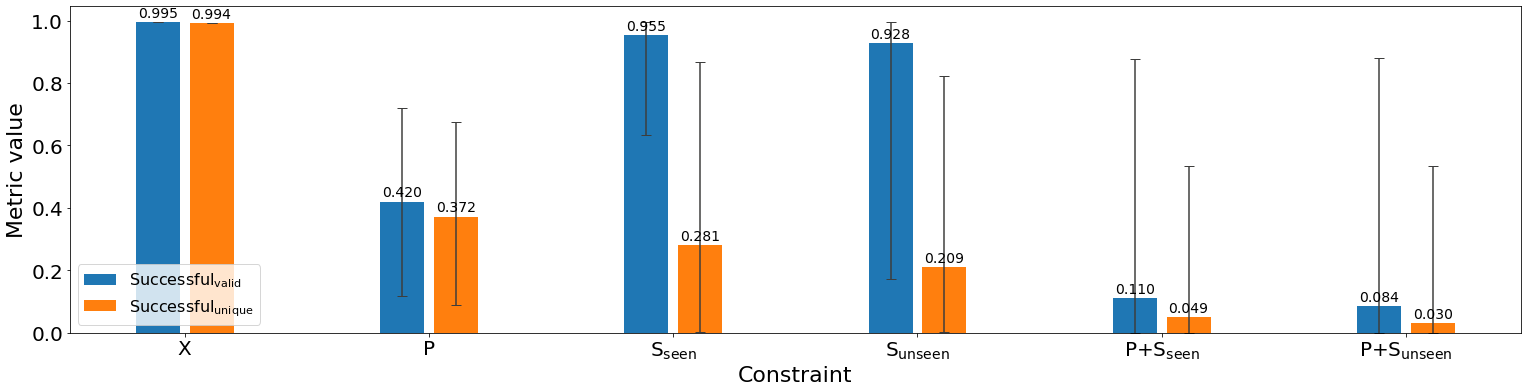

In [80]:
def plot_with_limits(df1, df2):
    methods = df1.columns  # Assuming common column names represent methods
    
    # Calculate mean, upper limit, and lower limit for each method in both DataFrames
    means1 = df1.mean()
    upper_limits1 = df1.max()
    lower_limits1 = df1.min()
    
    means2 = df2.mean()
    upper_limits2 = df2.max()
    lower_limits2 = df2.min()
    
    # Prepare data for plotting
    x = range(len(methods))
    width = 0.22
    bar_width = 0.18
    
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(26, 6))
    rects1 = ax.bar(x, means1, bar_width, label='DataFrame 1')
    rects2 = ax.bar([pos + width for pos in x], means2, bar_width, label='DataFrame 2')
    
    # Add error bars representing upper and lower limits
    ax.errorbar(x, means1, yerr=[means1 - lower_limits1, upper_limits1 - means1], fmt='none', color='#3d3d3c', capsize=5)
    ax.errorbar([pos + width for pos in x], means2, yerr=[means2 - lower_limits2, upper_limits2 - means2], fmt='none', color='#3d3d3c', capsize=5)
    
    # Configure plot settings
    ax.set_xticks([pos + width/2 for pos in x])
    ax.set_xticklabels(methods)
    ax.legend([r'$\mathdefault{Successful}_{\mathdefault{valid}}$', r'$\mathdefault{Successful}_{\mathdefault{unique}}$'],
              fontsize=16, loc='lower left')
    
    ax.set_xlabel('Constraint', fontsize=22)
    ax.set_ylabel('Metric value', fontsize=22)
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.3f}', xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5), textcoords='offset points', ha='center', fontsize=14, color='black')


    plt.tick_params(axis='both', which='both', labelsize=20)
    plt.show()

plot_with_limits(valid, unique)

### Metric value

In [3]:
valid   = [0.995, 0.957, 0.990, 0.990, 0.801, 0.769]
unique  = [0.999, 0.900, 0.306, 0.247, 0.429, 0.395]
novelty = [0.792, 0.953, 0.974, 0.998, 0.989, 0.997]
intDiv  = [0.854, 0.836, 0.660, 0.636, 0.577, 0.559]
SSF     = [np.NAN, np.NaN, 0.964, 0.937, 0.676, 0.627]

constraint = ['UC', 'P', r'S$_{\mathdefault{seen}}$', r'S$_{\mathdefault{unseen}}$',
              r'P+S$_{\mathdefault{seen}}$', r'P+S$_{\mathdefault{unseen}}$']

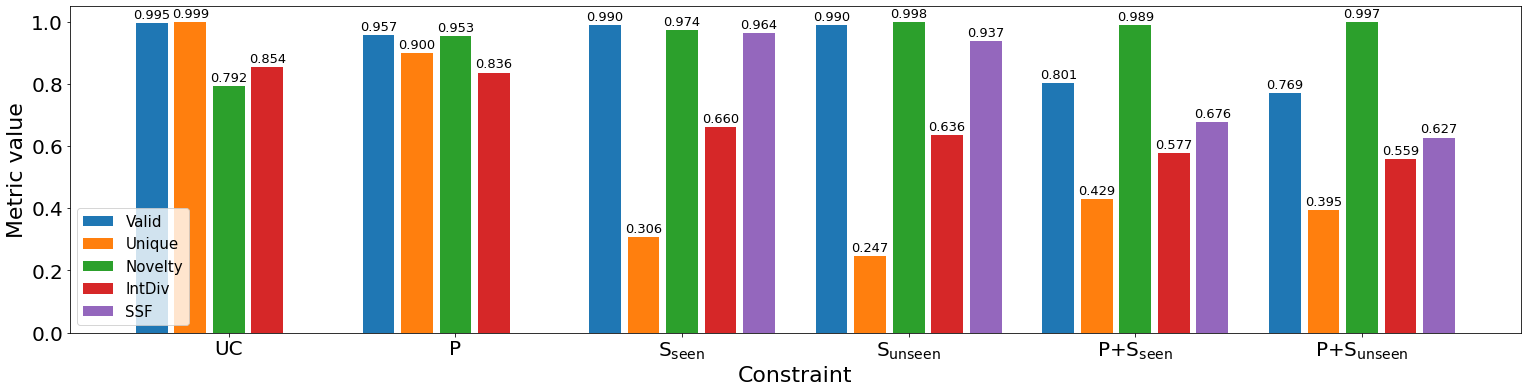

In [4]:
def plot_with_limits(*data_lists):
    methods = constraint
    # methods = range(len(data_lists[0]))  # Assuming the number of elements represents methods
    
    # Prepare data for plotting
    x = range(len(methods))
    width = 0.17
    # bar_width = width
    bar_width = 0.14
    
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(26, 6))
    
    rects = [ax.bar([pos + width*i for pos in x], data, bar_width, label=f'List {i+1}') for i, data in enumerate(data_lists)]
    
    # Configure plot settings
    ax.set_xticks([pos + width*(len(data_lists)//2) for pos in x])
    ax.set_xticklabels(methods)
    
    ax.legend(['Valid', 'Unique', 'Novelty', 'IntDiv', 'SSF'], fontsize=15, loc='lower left')
    
    ax.set_xlabel('Constraint', fontsize=22)
    ax.set_ylabel('Metric value', fontsize=22)
    
    for rect_set in rects:
        for p in rect_set:
            height = p.get_height()
            ax.annotate(f'{height:.3f}', xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 5), textcoords='offset points', ha='center', fontsize=13, color='black')
    
    plt.tick_params(axis='both', which='both', labelsize=20)
    plt.show()


plot_with_limits(valid, unique, novelty, intDiv, SSF)